In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np

In [2]:
Sale_Outlet={}
Purchase_Outlet={}
for i in range(3):
    Sale_Outlet[str(i+1)] = pd.read_excel(r"data/Master Data (Sales).xlsx", sheet_name="Sales - Outlet "+str(i+1),engine="openpyxl")
    Purchase_Outlet[str(i+1)] = pd.read_excel(r"data/Master Data (Purchase).xlsx", sheet_name="Purchase - Outlet "+str(i+1),engine="openpyxl")


create dataset with all set to 0

In [3]:
stall = "3"

In [4]:
ProductList={"Enoki mushroom","Oyster mushroom","Shiitake mushroom","Pleurotus eryngii","Crab mushroom","Bamboo shoots","Spinach","Crown Daisy","Indian Lettuce","Fresh Lettuce","Chinese Cabbage","Baby Cabbage"}

In [5]:
dataset = pd.DataFrame({'Product - English Name': [], 'Date of Sale': [], 'Total Amount Sold': [],"month":[],"day":[],
                        'Quantity of Order Received':[],"Quantity of Order Placed":[], "Quantity of Order Left":[]})


for product in ProductList:
    day = datetime(2018, 1, 1)
    end = datetime(2021, 1, 1)
    while(day<end):#end with 2020,12,31
        new_row = {'Product - English Name': product, 'Date of Sale': day.strftime("%Y/%m/%d"),
                   'Total Amount Sold': 0.0, "month":day.month,"day":day.weekday(),"Quantity of Order Received":0,
                   "Quantity of Order Placed":0, "Quantity of Order Left":0}
        dataset = dataset.append(new_row, ignore_index=True)
        day = day + timedelta(days=1)
        
dataset

,Product - English Name,Date of Sale,Total Amount Sold,month,day,Quantity of Order Received,Quantity of Order Placed,Quantity of Order Left
0,Pleurotus eryngii,2018/01/01,0.0,1.0,0.0,0.0,0.0,0.0
1,Pleurotus eryngii,2018/01/02,0.0,1.0,1.0,0.0,0.0,0.0
2,Pleurotus eryngii,2018/01/03,0.0,1.0,2.0,0.0,0.0,0.0
3,Pleurotus eryngii,2018/01/04,0.0,1.0,3.0,0.0,0.0,0.0
4,Pleurotus eryngii,2018/01/05,0.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13147,Chinese Cabbage,2020/12/27,0.0,12.0,6.0,0.0,0.0,0.0
13148,Chinese Cabbage,2020/12/28,0.0,12.0,0.0,0.0,0.0,0.0
13149,Chinese Cabbage,2020/12/29,0.0,12.0,1.0,0.0,0.0,0.0
13150,Chinese Cabbage,2020/12/30,0.0,12.0,2.0,0.0,0.0,0.0


one for calculating total sale

In [6]:
dish_to_product = {
    "A001-1":{"Enoki mushroom":2},
    "A001-2":{"Enoki mushroom":1},
    "A013":{"Enoki mushroom":1,
            "Oyster mushroom":0.5,
            "Shiitake mushroom":0.043,
            "Pleurotus eryngii":0.075,
            "Crab mushroom":0.5},
    "A002-1":{"Oyster mushroom":1},
    "A002-2":{"Oyster mushroom":0.5},
    "A003-1":{"Shiitake mushroom":0.085},
    "A003-2":{"Shiitake mushroom":0.043},
    "A004-1":{"Pleurotus eryngii":0.15},
    "A004-2":{"Pleurotus eryngii":0.075},
    "A005-1":{"Crab mushroom":1},
    "A005-2":{"Crab mushroom":0.5},
    "A006-1":{"Bamboo shoots":1},
    "A006-2":{"Bamboo shoots":0.5},
    "A007-1":{"Spinach":0.125},
    "A014":{"Spinach":0.065,
            "Crown Daisy":0.065,
            "Indian Lettuce":0.075,
            "Fresh Lettuce":0.05,
            "Chinese Cabbage":0.1},
    "A008-1":{"Crown Daisy":0.125},
    "A009-1":{"Indian Lettuce":0.15},
    "A009-1":{"Indian Lettuce":0.15},
    "A010-1":{"Fresh Lettuce":0.1},
    "A011-1":{"Chinese Cabbage":0.2},
    "A012-1":{"Baby Cabbage":0.14},
}

ProductList = {"Enoki mushroom", "Oyster mushroom","Shiitake mushroom",
               "Pleurotus eryngii","Crab mushroom","Bamboo shoots","Spinach",
               "Crown Daisy","Indian Lettuce","Fresh Lettuce","Chinese Cabbage",
               "Baby Cabbage"}

In [7]:
index = (dataset.index[(dataset["Date of Sale"]== "2018/01/01") & (dataset["Product - English Name"]== "Baby Cabbage")].values)
index = int(index[0])
index

dataset["Total Amount Sold"][index]

0.0

add all value to the result

In [8]:
for index, row in Sale_Outlet[stall].iterrows():
    #print(row[0],end=":"),print(row[3],end=":"),print(row[4])
    dish = row[0]
    date = row[3]
    num = row[4]
    for material,quantity in dish_to_product[dish].items():
        #print(material)
        #print(quantity)
        index = (dataset.index[(dataset["Date of Sale"]== date) & (dataset["Product - English Name"]== material)].values)
        index = int(index[0])
        dataset["Total Amount Sold"][index] = num*quantity + dataset["Total Amount Sold"][index]


<ipython-input-8-a3bc7888666c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Total Amount Sold"][index] = num*quantity + dataset["Total Amount Sold"][index]


In [9]:
dataset

,Product - English Name,Date of Sale,Total Amount Sold,month,day,Quantity of Order Received,Quantity of Order Placed,Quantity of Order Left
0,Pleurotus eryngii,2018/01/01,1.20,1.0,0.0,0.0,0.0,0.0
1,Pleurotus eryngii,2018/01/02,0.15,1.0,1.0,0.0,0.0,0.0
2,Pleurotus eryngii,2018/01/03,0.00,1.0,2.0,0.0,0.0,0.0
3,Pleurotus eryngii,2018/01/04,0.15,1.0,3.0,0.0,0.0,0.0
4,Pleurotus eryngii,2018/01/05,0.45,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13147,Chinese Cabbage,2020/12/27,1.50,12.0,6.0,0.0,0.0,0.0
13148,Chinese Cabbage,2020/12/28,2.20,12.0,0.0,0.0,0.0,0.0
13149,Chinese Cabbage,2020/12/29,1.60,12.0,1.0,0.0,0.0,0.0
13150,Chinese Cabbage,2020/12/30,1.40,12.0,2.0,0.0,0.0,0.0


one for adding [Purchase,Quantity of Order placed,Quantity of Order left]

In [10]:
Purchase_Outlet[stall]

,SKU,Product Name - English,Product Name - Chinese,Date of Purchase,Quantity of Order Placed,Quantity of Order Received
0,A001,Enoki Mushroom,金针菇,2018/04/15,20.0,20.0
1,A001,Enoki Mushroom,金针菇,2018/04/16,15.0,15.0
2,A001,Enoki Mushroom,金针菇,2018/04/17,15.0,15.0
3,A001,Enoki Mushroom,金针菇,2018/04/18,20.0,20.0
4,A001,Enoki Mushroom,金针菇,2018/04/19,20.0,20.0
...,...,...,...,...,...,...
6638,A012,Baby Cabbage,娃娃菜,2020/11/24,6.0,6.0
6639,A012,Baby Cabbage,娃娃菜,2020/11/26,5.0,5.0
6640,A012,Baby Cabbage,娃娃菜,2020/11/27,6.0,6.0
6641,A012,Baby Cabbage,娃娃菜,2020/11/28,8.0,8.0


In [11]:
dataset

,Product - English Name,Date of Sale,Total Amount Sold,month,day,Quantity of Order Received,Quantity of Order Placed,Quantity of Order Left
0,Pleurotus eryngii,2018/01/01,1.20,1.0,0.0,0.0,0.0,0.0
1,Pleurotus eryngii,2018/01/02,0.15,1.0,1.0,0.0,0.0,0.0
2,Pleurotus eryngii,2018/01/03,0.00,1.0,2.0,0.0,0.0,0.0
3,Pleurotus eryngii,2018/01/04,0.15,1.0,3.0,0.0,0.0,0.0
4,Pleurotus eryngii,2018/01/05,0.45,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13147,Chinese Cabbage,2020/12/27,1.50,12.0,6.0,0.0,0.0,0.0
13148,Chinese Cabbage,2020/12/28,2.20,12.0,0.0,0.0,0.0,0.0
13149,Chinese Cabbage,2020/12/29,1.60,12.0,1.0,0.0,0.0,0.0
13150,Chinese Cabbage,2020/12/30,1.40,12.0,2.0,0.0,0.0,0.0


In [12]:
index = (dataset.index[(dataset["Date of Sale"]== "2018/01/01") & (dataset["Product - English Name"]== "Enoki Mushroom")].values)
index

array([], dtype=int64)

In [13]:
name_conversion = {
    "Enoki Mushroom":"Enoki mushroom",
    "Oyster Mushroom":"Oyster mushroom",
    "Shiitake Mushroom":"Shiitake mushroom",
    "King Mushroom":"Pleurotus eryngii",
    "Buna Shimeiji":"Crab mushroom",
    "Bamboo Shoot":"Bamboo shoots",
    "Spinach":"Spinach",
    "Tung Oh":"Crown Daisy",
    "Xiang Mai":"Indian Lettuce",
    "Fresh Lettuce":"Fresh Lettuce",
    "Chinese Cabbage":"Chinese Cabbage",
    "Baby Cabbage":"Baby Cabbage"
}

In [15]:
for index, row in Purchase_Outlet[stall].iterrows():
    date = row[3]
    material = row[1]
    index = (dataset.index[(dataset["Date of Sale"]== date) & ((dataset["Product - English Name"])== (name_conversion[material]))].values)
    index = int(index[0])
    
    placed = row[4]
    dataset["Quantity of Order Received"][index] = placed
    
    Received = row[5]
    dataset["Quantity of Order Placed"][index] = Received
    
    left = Received - dataset["Total Amount Sold"][index]
    dataset["Quantity of Order Left"][index] = left
dataset

<ipython-input-15-448c7c3f5fef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Quantity of Order Received"][index] = placed
<ipython-input-15-448c7c3f5fef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Quantity of Order Placed"][index] = Received
<ipython-input-15-448c7c3f5fef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Quantity of Order Left"][index] = left


,Product - English Name,Date of Sale,Total Amount Sold,month,day,Quantity of Order Received,Quantity of Order Placed,Quantity of Order Left
0,Pleurotus eryngii,2018/01/01,1.20,1.0,0.0,0.0,0.0,0.0
1,Pleurotus eryngii,2018/01/02,0.15,1.0,1.0,0.0,0.0,0.0
2,Pleurotus eryngii,2018/01/03,0.00,1.0,2.0,0.0,0.0,0.0
3,Pleurotus eryngii,2018/01/04,0.15,1.0,3.0,0.0,0.0,0.0
4,Pleurotus eryngii,2018/01/05,0.45,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13147,Chinese Cabbage,2020/12/27,1.50,12.0,6.0,0.0,0.0,0.0
13148,Chinese Cabbage,2020/12/28,2.20,12.0,0.0,0.0,0.0,0.0
13149,Chinese Cabbage,2020/12/29,1.60,12.0,1.0,0.0,0.0,0.0
13150,Chinese Cabbage,2020/12/30,1.40,12.0,2.0,0.0,0.0,0.0


In [17]:
dataset.to_csv('Outlet{}.csv'.format(stall), index=False)

visualization

In [18]:
new_data = dataset.loc[dataset["Product - English Name"]== "Shiitake mushroom"]
new_data

,Product - English Name,Date of Sale,Total Amount Sold,month,day,Quantity of Order Received,Quantity of Order Placed,Quantity of Order Left
8768,Shiitake mushroom,2018/01/01,0.513,1.0,0.0,0.0,0.0,0.0
8769,Shiitake mushroom,2018/01/02,0.256,1.0,1.0,0.0,0.0,0.0
8770,Shiitake mushroom,2018/01/03,0.000,1.0,2.0,0.0,0.0,0.0
8771,Shiitake mushroom,2018/01/04,0.256,1.0,3.0,0.0,0.0,0.0
8772,Shiitake mushroom,2018/01/05,0.513,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9859,Shiitake mushroom,2020/12/27,0.128,12.0,6.0,0.0,0.0,0.0
9860,Shiitake mushroom,2020/12/28,0.342,12.0,0.0,0.0,0.0,0.0
9861,Shiitake mushroom,2020/12/29,0.129,12.0,1.0,0.0,0.0,0.0
9862,Shiitake mushroom,2020/12/30,0.471,12.0,2.0,0.0,0.0,0.0


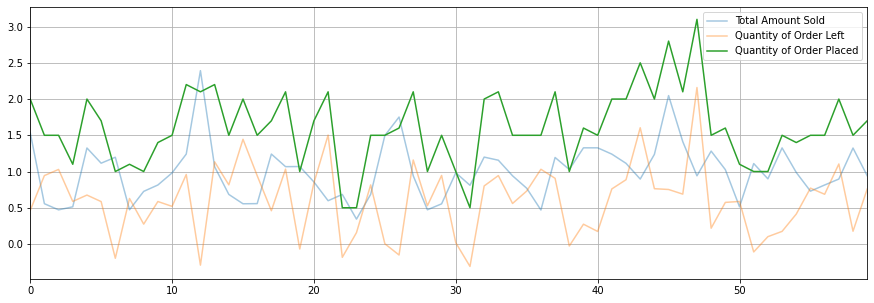

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Outlet1.csv")
show_data = data.loc[data["Product - English Name"]== "Shiitake mushroom"]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.grid(True)
plt.autoscale(axis='x',tight=True)
i=0
d=60
plt.plot(show_data['Total Amount Sold'][i:i+d], alpha=0.4,label='Total Amount Sold')
plt.plot(show_data['Quantity of Order Left'][i:i+d], alpha=0.4, label='Quantity of Order Left')
plt.plot(show_data['Quantity of Order Placed'][i:i+d],label='Quantity of Order Placed')
plt.legend()